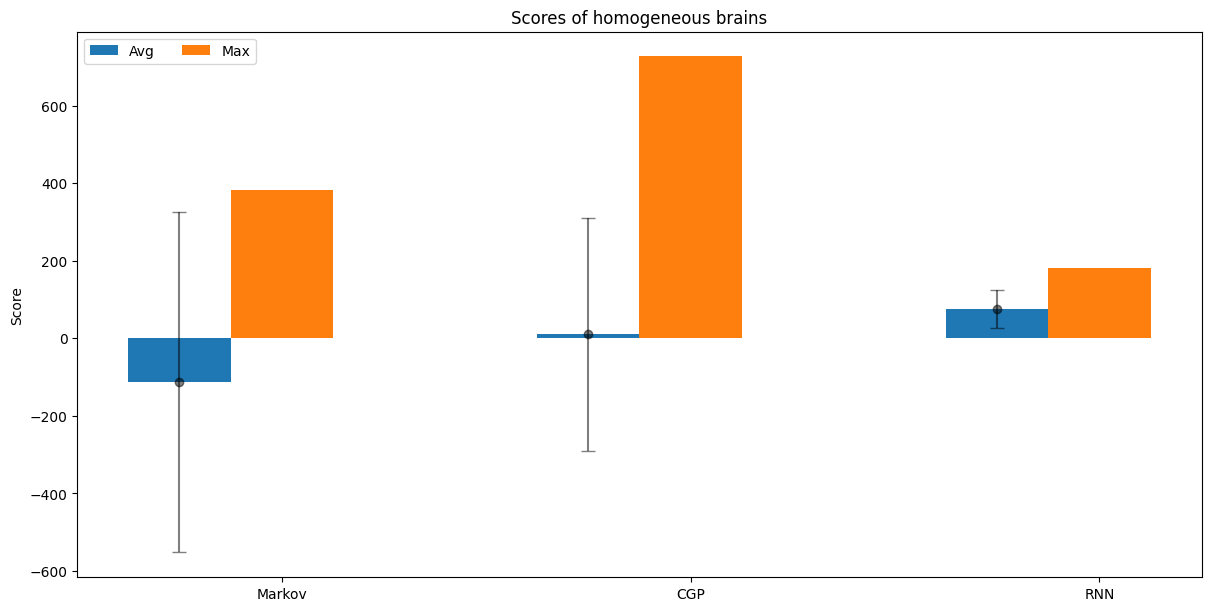

In [2]:
#F1
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import statistics
import seaborn as sns


def get_scores(path):
    scores = []
    for dirpath, dirnames, filenames in os.walk(path):
        if "pop.csv" in filenames and "/001" not in dirpath:
            file_path = os.path.join(dirpath, "pop.csv")
            df = pd.read_csv(file_path)
            scores.append(df["score_AVE"].iloc[-1])
    return scores


markov_scores = get_scores("postcanada/r150HeteroHomo/r150all_C6__CMR_0.0__IA1_20__BRN_Markov__BRN2_CGP")
cgp_scores = get_scores("postcanada/r150HeteroHomo/r150all_C8__CMR_0.0__IA1_20__BRN_CGP__BRN2_Markov")
rnn_scores = get_scores("postcanada/r150HeteroHomo/r150all_C7__CMR_0.0__IA1_20__BRN_RNN__BRN2_CGP")
# print(markov_scores)
# print(cgp_scores)
# print(rnn_scores)

brains = ("Markov", "CGP", "RNN")
avg_scores = (
    sum(markov_scores) / len(markov_scores),
    sum(cgp_scores) / len(cgp_scores),
    sum(rnn_scores) / len(rnn_scores)
)
std_devs = (
    statistics.stdev(markov_scores),
    statistics.stdev(cgp_scores),
    statistics.stdev(rnn_scores)
)

scores = {
    'Avg': avg_scores,
    'Max': (
        max(markov_scores),
        max(cgp_scores),
        max(rnn_scores)
    ),
}

x = np.arange(len(brains))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
ax.errorbar(x, avg_scores, yerr=std_devs, fmt='o', color='black', alpha=0.5, capsize=5, zorder=2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores of homogeneous brains')
ax.set_xticks(x + width, brains)
ax.legend(loc='upper left', ncols=3)

plt.show()